In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from chart_studio.plotly import plot,iplot
import cufflinks as cf
import seaborn as sns
%matplotlib inline
sns.set(rc={'figure.figsize': [8, 8]}, font_scale=1.2)


In [2]:
#!pip install chart_studio


In [3]:
#!pip install cufflinks


In [4]:
df=pd.read_excel("Flight_Data.xlsx")


In [5]:
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [6]:
df.shape


(10683, 11)

In [7]:
df.dtypes #checking the data types


Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [8]:
df.isna().sum() #Checking null values


Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [9]:
#Remove the NaN values from the dataset
df.dropna(how='any',inplace=True)
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

## Feature Engineering


#### Let's convert Date_of_Journey to its appropriate format as datetime with regards to day and month



In [10]:
df.head(10)


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
5,SpiceJet,24/06/2019,Kolkata,Banglore,CCU → BLR,09:00,11:25,2h 25m,non-stop,No info,3873
6,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,18:55,10:25 13 Mar,15h 30m,1 stop,In-flight meal not included,11087
7,Jet Airways,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,08:00,05:05 02 Mar,21h 5m,1 stop,No info,22270
8,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,08:55,10:25 13 Mar,25h 30m,1 stop,In-flight meal not included,11087
9,Multiple carriers,27/05/2019,Delhi,Cochin,DEL → BOM → COK,11:25,19:15,7h 50m,1 stop,No info,8625


## Date_of_journey


In [11]:
df['Date_of_Journey']=pd.to_datetime(df['Date_of_Journey'])
df['Day_of_Journey']=(df['Date_of_Journey']).dt.day
df['Month_of_Journey']=(df['Date_of_Journey']).dt.month

In [12]:
df.head()


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,5,1
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,6,9
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,5,12
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,3,1


In [13]:
#we can now drop the Date_of_journey
df.drop(["Date_of_Journey"],axis=1,inplace=True)

In [14]:
df

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,5,1
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,6,9
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,5,12
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107,4,9
10679,Air India,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145,27,4
10680,Jet Airways,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229,27,4
10681,Vistara,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648,3,1


## Dep_time


In [15]:
#covert to datetime
df['Dep_hr']=pd.to_datetime(df['Dep_Time']).dt.hour
df['Dep_min']=pd.to_datetime(df['Dep_Time']).dt.minute

In [16]:
df

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Dep_hr,Dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,5,1,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,6,9,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,5,12,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,3,1,16,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107,4,9,19,55
10679,Air India,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145,27,4,20,45
10680,Jet Airways,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229,27,4,8,20
10681,Vistara,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648,3,1,11,30


In [17]:
#we can now drop the 'Dep_Time'

df.drop(["Dep_Time"],axis=1,inplace=True)

In [18]:
df

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Dep_hr,Dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,5,1,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,6,9,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,5,12,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,3,1,16,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,22:25,2h 30m,non-stop,No info,4107,4,9,19,55
10679,Air India,Kolkata,Banglore,CCU → BLR,23:20,2h 35m,non-stop,No info,4145,27,4,20,45
10680,Jet Airways,Banglore,Delhi,BLR → DEL,11:20,3h,non-stop,No info,7229,27,4,8,20
10681,Vistara,Banglore,New Delhi,BLR → DEL,14:10,2h 40m,non-stop,No info,12648,3,1,11,30


## Arrival_time


In [19]:
df['Arrival_hr']=pd.to_datetime(df['Arrival_Time']).dt.hour
df['Arrival_min']=pd.to_datetime(df['Arrival_Time']).dt.minute

In [20]:
df

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Dep_hr,Dep_min,Arrival_hr,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,5,1,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,6,9,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,5,12,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,3,1,16,50,21,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,22:25,2h 30m,non-stop,No info,4107,4,9,19,55,22,25
10679,Air India,Kolkata,Banglore,CCU → BLR,23:20,2h 35m,non-stop,No info,4145,27,4,20,45,23,20
10680,Jet Airways,Banglore,Delhi,BLR → DEL,11:20,3h,non-stop,No info,7229,27,4,8,20,11,20
10681,Vistara,Banglore,New Delhi,BLR → DEL,14:10,2h 40m,non-stop,No info,12648,3,1,11,30,14,10


In [21]:
#we can now drop the 'Arrival_Time'

df.drop(["Arrival_Time"],axis=1,inplace=True)


In [22]:
df

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Dep_hr,Dep_min,Arrival_hr,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,6,9,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,16,50,21,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,2h 30m,non-stop,No info,4107,4,9,19,55,22,25
10679,Air India,Kolkata,Banglore,CCU → BLR,2h 35m,non-stop,No info,4145,27,4,20,45,23,20
10680,Jet Airways,Banglore,Delhi,BLR → DEL,3h,non-stop,No info,7229,27,4,8,20,11,20
10681,Vistara,Banglore,New Delhi,BLR → DEL,2h 40m,non-stop,No info,12648,3,1,11,30,14,10


## Duration Time


In [23]:
#split duration datapoints based on space ' 
duration=df['Duration'].str.split(' ',expand=True) 
#fill all "NAN" with '00m'
duration[1].fillna('00m',inplace=True)   
df['duration_hr']=duration[0].apply(lambda x: x[:-1]) #select the item at index o and leave the last one (in this case the 'h')
df['duration_min']=duration[1].apply(lambda x: x[:-1]) #select the item at index 1 and leave the last one (in this case the 'm')

In [24]:
#we can now drop the 'Duration'

df.drop(["Duration"],axis=1,inplace=True)

In [25]:
df['duration_hr'].value_counts()

2     2402
1      621
3      501
7      487
5      482
9      445
12     428
8      424
13     407
11     365
10     355
6      340
14     337
15     268
23     264
26     241
16     234
4      222
22     218
24     197
21     196
25     186
27     179
20     162
18     141
19     134
17     129
28      94
29      65
30      49
38      34
37      17
33      13
32       9
34       8
36       7
35       7
31       6
39       2
47       2
42       2
40       1
41       1
Name: duration_hr, dtype: int64

In [26]:
df.head()


,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Dep_hr,Dep_min,Arrival_hr,Arrival_min,duration_hr,duration_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,5,1,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,6,9,9,25,4,25,19,00
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,5,12,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,3,1,16,50,21,35,4,45


In [27]:
cf.set_config_file(theme='ggplot',sharing='public',offline=True)


## Count of Airlines


In [28]:
df['Airline'].value_counts()


Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [29]:
df['Airline'].sort_values(ascending=False).unique()


array(['Vistara Premium economy', 'Vistara', 'Trujet', 'SpiceJet',
       'Multiple carriers Premium economy', 'Multiple carriers',
       'Jet Airways Business', 'Jet Airways', 'IndiGo', 'GoAir',
       'Air India', 'Air Asia'], dtype=object)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text xticklabel objects>)

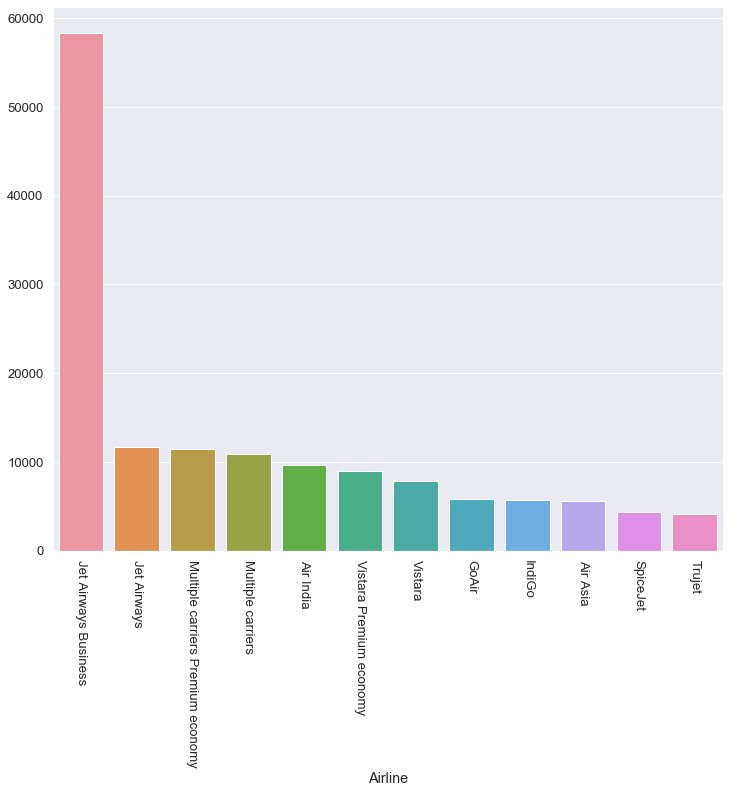

In [30]:
## Airline vs Price
Airprices=df.groupby('Airline')['Price'].mean().sort_values(ascending=False)
plt.figure(figsize=(12,10))
sns.barplot(Airprices.index,Airprices.values)
plt.xticks(rotation=270)

## from the above plot we noted that Jet Airways Business has the highest price with Trujet having the lowest



<function matplotlib.pyplot.show(*args, **kw)>

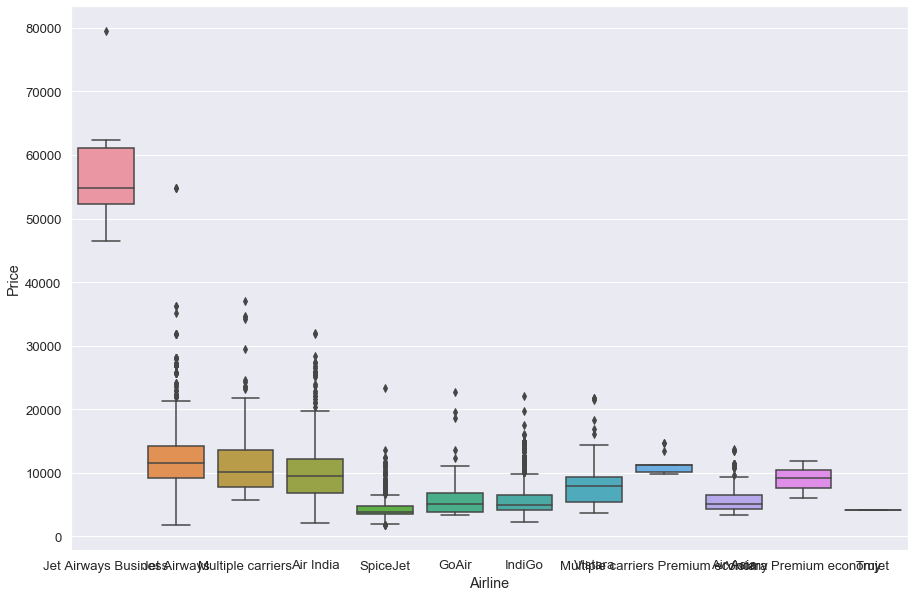

In [31]:
plt.figure(figsize=(15,10))
sns.boxplot(y='Price',x='Airline',data= df.sort_values('Price',ascending=False))
plt.show

## Price based on number of stops


In [32]:
df.groupby(['Airline','Total_Stops'])['Price'].mean()


Airline                            Total_Stops
Air Asia                           1 stop          7078.325581
                                   2 stops         6341.888889
                                   non-stop        4492.331492
Air India                          1 stop          9041.509259
                                   2 stops        12092.779101
                                   3 stops        12208.054054
                                   4 stops        17686.000000
                                   non-stop        5605.326139
GoAir                              1 stop          6884.676471
                                   non-stop        4726.173913
IndiGo                             1 stop          7104.717528
                                   2 stops         7507.526316
                                   non-stop        4731.174053
Jet Airways                        1 stop         12512.741223
                                   2 stops        13387.247467
        

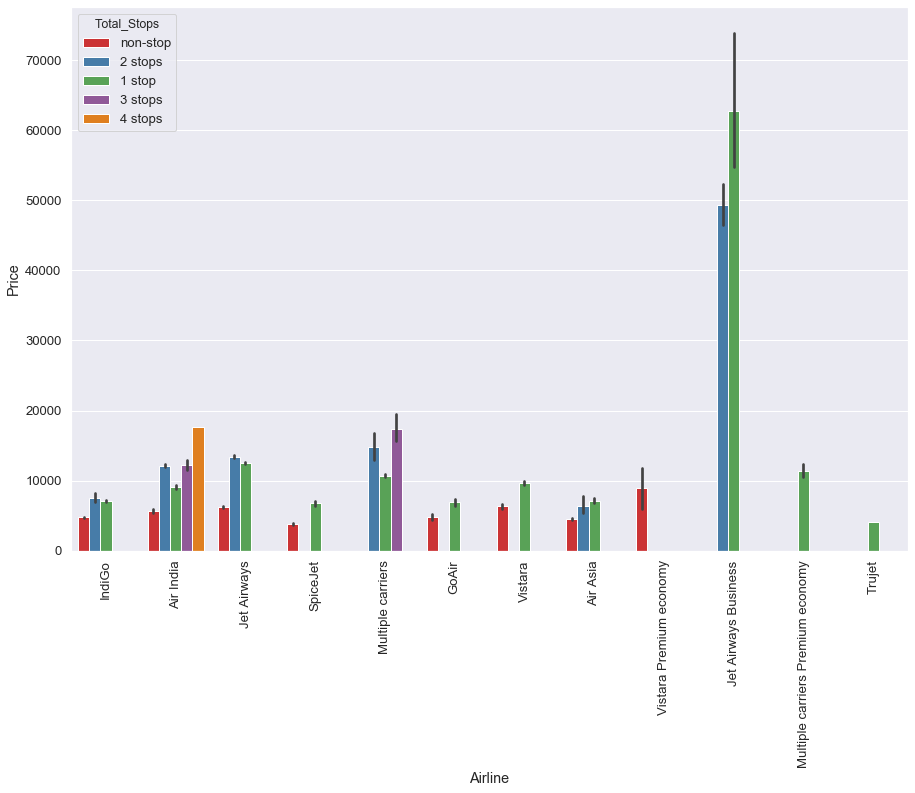

In [33]:
plt.figure(figsize=(15,10))
ax=sns.barplot(x=df['Airline'],y=df['Price'],hue=df['Total_Stops'],palette="Set1")
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show()

## we had found from the previous plot as One stop and two stpos Jet Airways Business is having the highest price



In [34]:
df['Source'].value_counts()


Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

In [35]:
df['Source'].sort_values(ascending=False).unique()


array(['Mumbai', 'Kolkata', 'Delhi', 'Chennai', 'Banglore'], dtype=object)

## Source vs Price


<function matplotlib.pyplot.show(*args, **kw)>

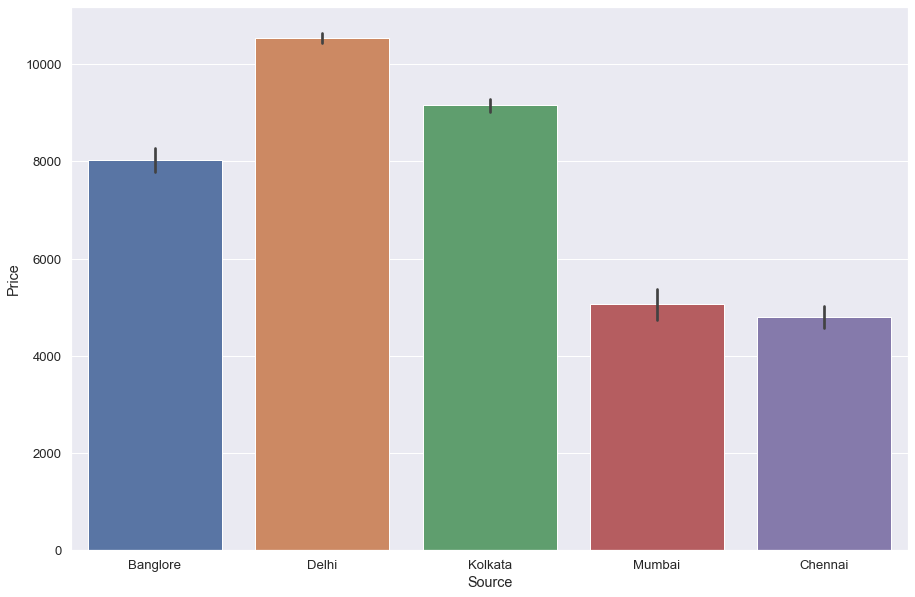

In [36]:
plt.figure(figsize=(15,10))
sns.barplot(y='Price',x='Source',data=df.sort_values('Price',ascending=False))
plt.show

## Destination vs Price


<function matplotlib.pyplot.show(*args, **kw)>

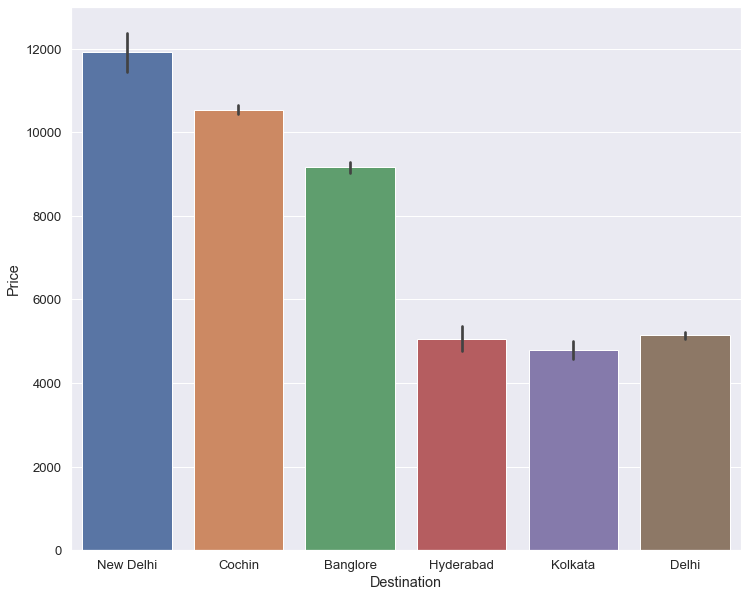

In [37]:
plt.figure(figsize=(12,10))
sns.barplot(y='Price',x='Destination',data=df.sort_values('Price',ascending=False))
plt.show

In [38]:
df['Additional_Info'].value_counts()


No info                         8344
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
2 Long layover                     1
1 Short layover                    1
Red-eye flight                     1
Name: Additional_Info, dtype: int64

In [39]:
# we found duplication in 2 word No Info & No info so we replace one with the other as below
for i in df:
    df.replace('No Info','No info',inplace=True)

In [40]:
df['Additional_Info'].value_counts()


No info                         8347
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
2 Long layover                     1
1 Short layover                    1
Red-eye flight                     1
Name: Additional_Info, dtype: int64

In [41]:
df['Additional_Info'].unique()


array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [42]:
df['Additional_Info'].sort_values(ascending=False).unique()


array(['Red-eye flight', 'No info', 'No check-in baggage included',
       'In-flight meal not included', 'Change airports', 'Business class',
       '2 Long layover', '1 Short layover', '1 Long layover'],
      dtype=object)

In [43]:
df['Route'].value_counts()# we note that no benefit from that feature will not add value or effect predicting Price


DEL → BOM → COK          2376
BLR → DEL                1552
CCU → BOM → BLR           979
CCU → BLR                 724
BOM → HYD                 621
                         ... 
BOM → JAI → DEL → HYD       1
CCU → IXB → DEL → BLR       1
BOM → COK → MAA → HYD       1
CCU → RPR → HYD → BLR       1
BOM → NDC → HYD             1
Name: Route, Length: 128, dtype: int64

In [44]:
df['Total_Stops'].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [45]:
df['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [46]:
df['Destination'].value_counts()


Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [47]:
# we found duplication in 2 word Delhi & New Delhi so we replace one with the other as below
for i in df:
    df.replace('New Delhi','Delhi',inplace=True)

In [48]:
df['Destination'].value_counts()


Cochin       4536
Banglore     2871
Delhi        2197
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [49]:
df['Destination'].unique()


array(['Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Hyderabad'],
      dtype=object)

In [50]:
df['Destination'].sort_values(ascending=False).unique()


array(['Kolkata', 'Hyderabad', 'Delhi', 'Cochin', 'Banglore'],
      dtype=object)

<function matplotlib.pyplot.show(*args, **kw)>

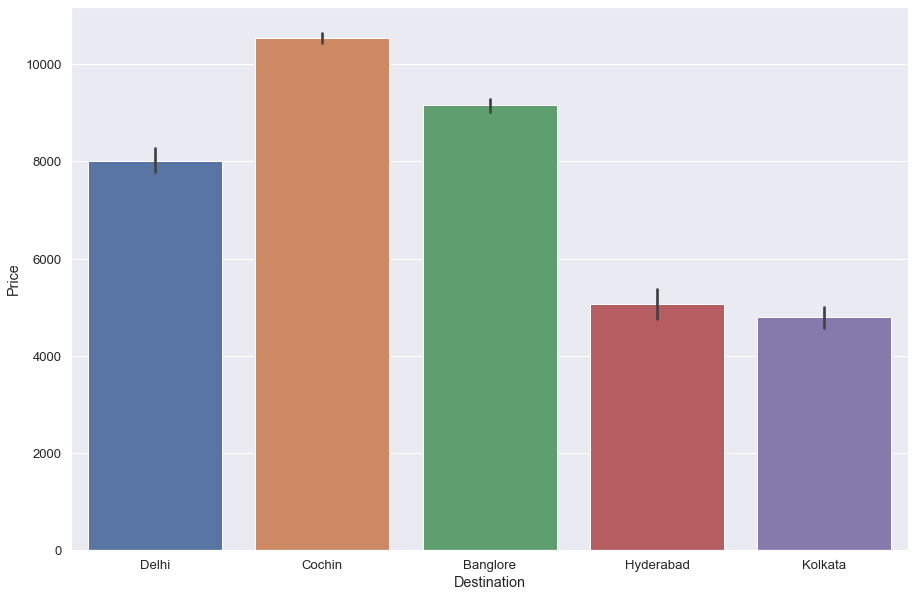

In [51]:
plt.figure(figsize=(15,10))
sns.barplot(y='Price',x='Destination',data=df.sort_values('Price',ascending=False))
plt.show

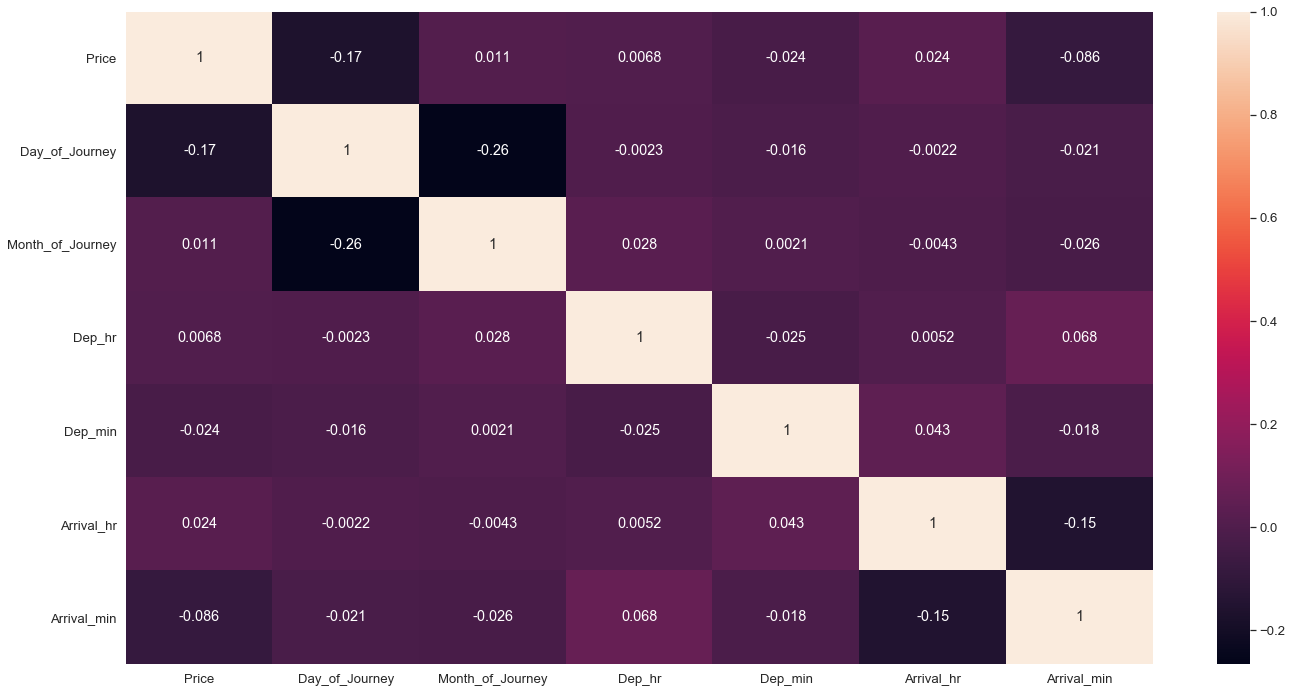

In [52]:
plt.figure(figsize=(23,12))
sns.heatmap(df.corr(),annot=True)

In [53]:
df

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Dep_hr,Dep_min,Arrival_hr,Arrival_min,duration_hr,duration_min
0,IndiGo,Banglore,Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,5,1,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,6,9,9,25,4,25,19,00
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,5,12,18,5,23,30,5,25
4,IndiGo,Banglore,Delhi,BLR → NAG → DEL,1 stop,No info,13302,3,1,16,50,21,35,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,non-stop,No info,4107,4,9,19,55,22,25,2,30
10679,Air India,Kolkata,Banglore,CCU → BLR,non-stop,No info,4145,27,4,20,45,23,20,2,35
10680,Jet Airways,Banglore,Delhi,BLR → DEL,non-stop,No info,7229,27,4,8,20,11,20,3,00
10681,Vistara,Banglore,Delhi,BLR → DEL,non-stop,No info,12648,3,1,11,30,14,10,2,40


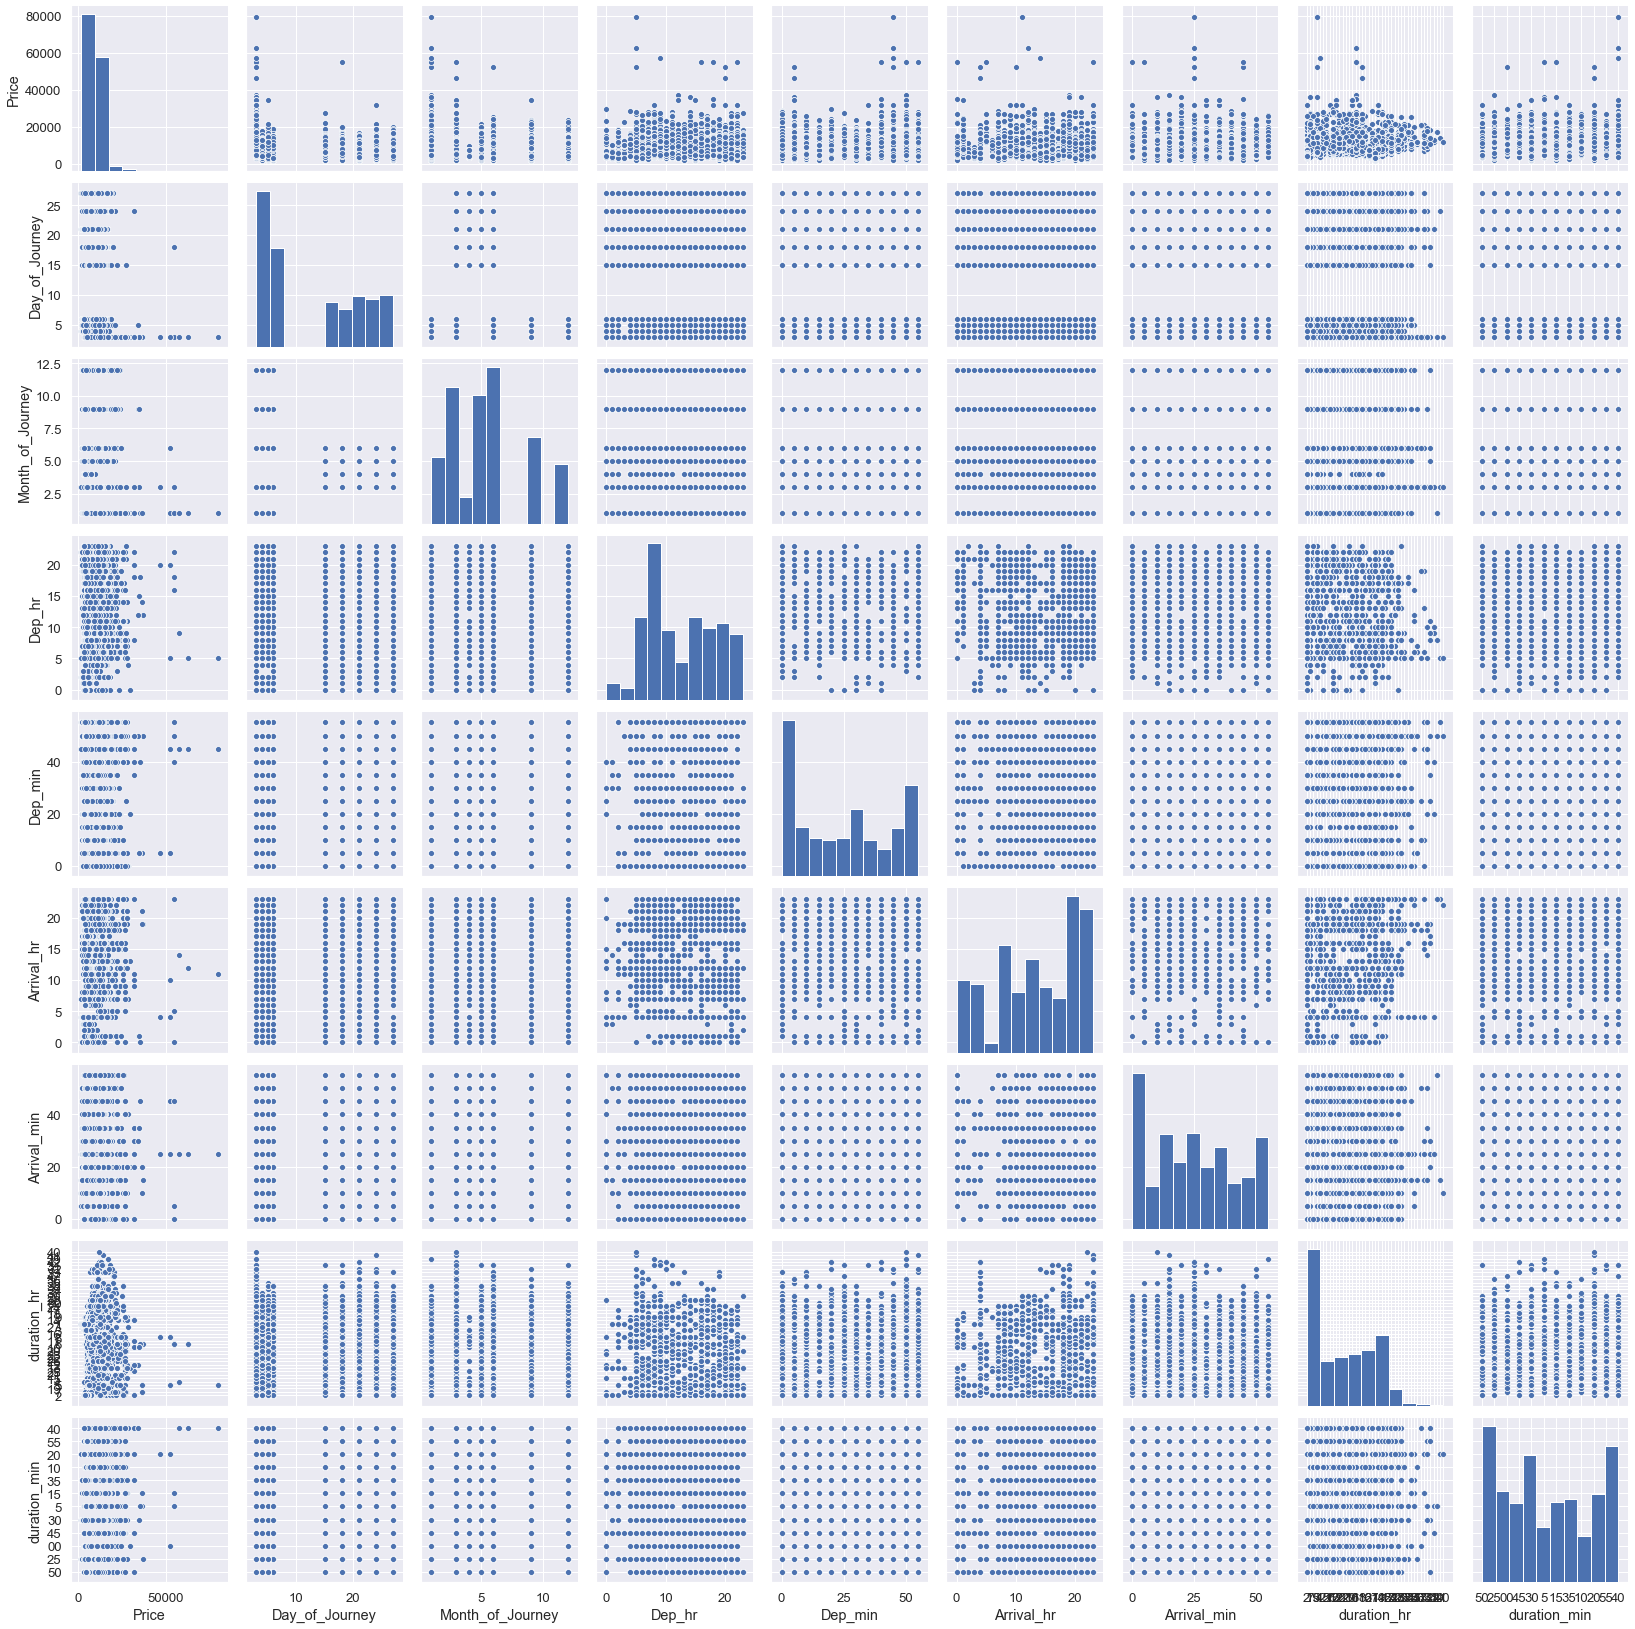

In [54]:
sns.pairplot(df)

## Categorical Features

### 1- Destination
### 2- Route
### 3- Source
### 4- Airline
### 5- Additional_Info
### 6- Total_Stops

#### As we metioned above we not need Route feature

## Apply Onehot Encoding on the categorical variables


In [55]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [56]:
df['Airline'] = encoder.fit_transform(df['Airline'])

df['Destination'] = encoder.fit_transform(df['Destination'])

df['Source'] = encoder.fit_transform(df['Source'])

df['Additional_Info'] = encoder.fit_transform(df['Additional_Info'])

df['Total_Stops'] = encoder.fit_transform(df['Total_Stops'])


In [57]:
#df.drop(['Route'],inplace=True,axis=1)


In [58]:
df.drop(['Route'],inplace=True,axis=1)


In [59]:
df

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Dep_hr,Dep_min,Arrival_hr,Arrival_min,duration_hr,duration_min
0,3,0,2,4,7,3897,24,3,22,20,1,10,2,50
1,1,3,0,1,7,7662,5,1,5,50,13,15,7,25
2,4,2,1,1,7,13882,6,9,9,25,4,25,19,00
3,3,3,0,0,7,6218,5,12,18,5,23,30,5,25
4,3,0,2,0,7,13302,3,1,16,50,21,35,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,3,0,4,7,4107,4,9,19,55,22,25,2,30
10679,1,3,0,4,7,4145,27,4,20,45,23,20,2,35
10680,4,0,2,4,7,7229,27,4,8,20,11,20,3,00
10681,10,0,2,4,7,12648,3,1,11,30,14,10,2,40


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Airline           10682 non-null  int32 
 1   Source            10682 non-null  int32 
 2   Destination       10682 non-null  int32 
 3   Total_Stops       10682 non-null  int32 
 4   Additional_Info   10682 non-null  int32 
 5   Price             10682 non-null  int64 
 6   Day_of_Journey    10682 non-null  int64 
 7   Month_of_Journey  10682 non-null  int64 
 8   Dep_hr            10682 non-null  int64 
 9   Dep_min           10682 non-null  int64 
 10  Arrival_hr        10682 non-null  int64 
 11  Arrival_min       10682 non-null  int64 
 12  duration_hr       10682 non-null  object
 13  duration_min      10682 non-null  object
dtypes: int32(5), int64(7), object(2)
memory usage: 1.3+ MB


In [61]:
cols = ['duration_hr', 'duration_min']
df[cols] = df[cols].applymap(np.int64)

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Airline           10682 non-null  int32
 1   Source            10682 non-null  int32
 2   Destination       10682 non-null  int32
 3   Total_Stops       10682 non-null  int32
 4   Additional_Info   10682 non-null  int32
 5   Price             10682 non-null  int64
 6   Day_of_Journey    10682 non-null  int64
 7   Month_of_Journey  10682 non-null  int64
 8   Dep_hr            10682 non-null  int64
 9   Dep_min           10682 non-null  int64
 10  Arrival_hr        10682 non-null  int64
 11  Arrival_min       10682 non-null  int64
 12  duration_hr       10682 non-null  int64
 13  duration_min      10682 non-null  int64
dtypes: int32(5), int64(9)
memory usage: 1.3 MB


In [63]:
x=df.drop(['Price'],axis=1)


In [64]:
x

,Airline,Source,Destination,Total_Stops,Additional_Info,Day_of_Journey,Month_of_Journey,Dep_hr,Dep_min,Arrival_hr,Arrival_min,duration_hr,duration_min
0,3,0,2,4,7,24,3,22,20,1,10,2,50
1,1,3,0,1,7,5,1,5,50,13,15,7,25
2,4,2,1,1,7,6,9,9,25,4,25,19,0
3,3,3,0,0,7,5,12,18,5,23,30,5,25
4,3,0,2,0,7,3,1,16,50,21,35,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,3,0,4,7,4,9,19,55,22,25,2,30
10679,1,3,0,4,7,27,4,20,45,23,20,2,35
10680,4,0,2,4,7,27,4,8,20,11,20,3,0
10681,10,0,2,4,7,3,1,11,30,14,10,2,40


In [65]:
x.columns

Index(['Airline', 'Source', 'Destination', 'Total_Stops', 'Additional_Info',
       'Day_of_Journey', 'Month_of_Journey', 'Dep_hr', 'Dep_min', 'Arrival_hr',
       'Arrival_min', 'duration_hr', 'duration_min'],
      dtype='object')

In [66]:
y=df['Price']
y

0         3897
1         7662
2        13882
3         6218
4        13302
         ...  
10678     4107
10679     4145
10680     7229
10681    12648
10682    11753
Name: Price, Length: 10682, dtype: int64

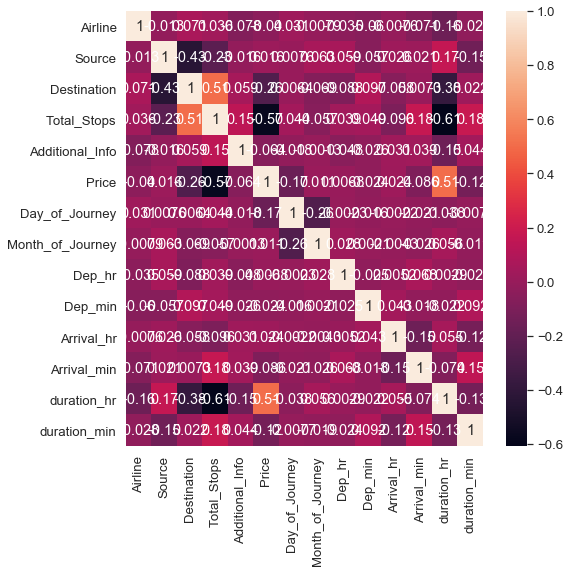

In [67]:
sns.heatmap(df.corr(), annot=True)

In [71]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, MaxAbsScaler
from sklearn.model_selection import train_test_split


In [72]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=101)

In [73]:
print(x.shape, x_train.shape, x_test.shape)

(10682, 13) (8545, 13) (2137, 13)


In [74]:
print(y.shape, y_train.shape, y_test.shape)

(10682,) (8545,) (2137,)


In [75]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

In [76]:
models = {
    "LR": LinearRegression(),
    "KNNR" : KNeighborsRegressor(), 
    "SVR": SVR(),
    "DT": DecisionTreeRegressor(),
    "RF": RandomForestRegressor(),
    "XGBR": XGBRegressor()
}

In [77]:
for name, model in models.items():
    print(f'Using model: {name}')
    model.fit(x_train, y_train)
    print(f'Training Score: {model.score(x_train, y_train)}')
    print(f'Test Score: {model.score(x_test, y_test)}')  
    print('-'*30)

Using model: LR
Training Score: 0.40776983578855763
Test Score: 0.42089137892699624
------------------------------
Using model: KNNR
Training Score: 0.7494879074876268
Test Score: 0.6376689369365229
------------------------------
Using model: SVR
Training Score: 0.007984543454840676
Test Score: 0.012826416198006505
------------------------------
Using model: DT
Training Score: 0.9958586410420267
Test Score: 0.7932497111151541
------------------------------
Using model: RF
Training Score: 0.9776004240081247
Test Score: 0.8947573719930264
------------------------------
Using model: XGBR
Training Score: 0.9746596110032235
Test Score: 0.9082300140442368
------------------------------


In [78]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)
x_train= scaler.transform(x_train)
x_test= scaler.transform(x_test)

In [79]:
x_train

array([[ 0.85881386,  0.04007252, -0.17411097, ..., -1.49194882,
         0.0814716 ,  0.1047208 ],
       [ 0.00978691,  0.04007252, -0.17411097, ...,  0.02258058,
         1.37046725,  1.58379389],
       [ 0.00978691,  0.04007252, -0.17411097, ...,  0.02258058,
        -0.50443551,  0.40053542],
       ...,
       [-1.26375351,  0.04007252, -0.17411097, ..., -0.58323118,
         1.83919293, -1.67016691],
       [-0.41472656,  0.04007252, -0.17411097, ...,  1.23420409,
        -0.62161693,  0.99216465],
       [ 1.7078408 , -1.65928073,  0.81313407, ..., -0.2803253 ,
        -0.9731612 ,  1.28797927]])

In [80]:
x_test

array([[ 1.7078408 ,  0.88974915, -1.16135602, ...,  0.02258058,
        -0.9731612 , -0.19109382],
       [ 2.55686775, -0.80960411,  2.78762416, ..., -1.18904294,
        -0.9731612 , -0.48690844],
       [ 0.00978691,  0.04007252, -0.17411097, ...,  0.02258058,
        -0.27007267,  1.58379389],
       ...,
       [ 1.7078408 ,  0.88974915, -1.16135602, ...,  0.02258058,
        -0.9731612 , -0.19109382],
       [-1.26375351,  0.04007252, -0.17411097, ..., -0.58323118,
         0.19865302, -0.78272306],
       [-0.41472656,  0.04007252, -0.17411097, ...,  1.23420409,
        -0.73879835,  0.69635003]])

In [81]:
from xgboost import XGBRegressor
model= XGBRegressor(max_depth= 2, n_estimators=100)
from sklearn import metrics
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error


In [82]:
# from xgboost import XGBRegressor

# model= XGBRegressor(max_depth= 2, n_estimators=100)

In [83]:
from sklearn.model_selection import GridSearchCV

n_estimators = [25, 50, 100]
max_depth = [1, 2, 3, 5]

hyperparameter_grid = {
    'n_estimators': n_estimators,
    'max_depth':max_depth}


search= GridSearchCV(model, hyperparameter_grid , cv=8).fit(x_train, y_train)
search.best_params_

{'max_depth': 5, 'n_estimators': 100}

In [84]:
model.fit(x_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=2, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=8,
             num_parallel_tree=1, objective='reg:squarederror',
             predictor='auto', random_state=0, reg_alpha=0, reg_lambda=1,
             scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [85]:
y_pred = model.predict(x_test)


In [86]:
y_pred

array([ 2569.276 ,  7119.1523, 10799.946 , ...,  3655.8318,  8405.061 ,
        5108.5376], dtype=float32)

In [87]:
y_test

7098     3841
2650    11982
8274    10368
7611    11552
9074     8098
        ...  
8963    10844
6166    12718
3686     3841
392      8669
4094     5947
Name: Price, Length: 2137, dtype: int64

In [88]:
r2_score(y_test, y_pred)

0.8129329977060126

In [89]:
model.score(x_train, y_train)

0.8185671634319054

In [90]:
x_train_pred= model.predict(x_train)


In [91]:
x_train_pred

array([10634.605, 13828.564, 10161.897, ..., 15135.002,  6907.894,
        4574.272], dtype=float32)

In [92]:
model.score(x_train, y_train)

0.8185671634319054

In [93]:
# In order to check the performance of the model we find the R squared Value
R2_sales = metrics.r2_score(y_train,x_train_pred)
print('R Squared value = ', R2_sales)

R Squared value =  0.8185671634319055


In [94]:
x_test_pred = model.predict(x_test)

In [95]:
# R squared Value
R2_test = metrics.r2_score(y_test, x_test_pred)
print('R Squared value = ', R2_test)

R Squared value =  0.8129329977060126


In [96]:
print(r2_score(y_test,y_pred))
print(mean_absolute_error(y_test,y_pred))
print(np.sqrt(mean_squared_error(y_test,y_pred)))

0.8129329977060126
1279.4693434433675
2015.8950274542185


In [97]:
import joblib

In [98]:
# saving model & Scaler
joblib.dump(model,'model.h5')

['model.h5']

In [99]:
joblib.dump(scaler,'scaler.h5')

['scaler.h5']

In [101]:
#data = {'Airline' : 'IndiGo','Destination' : 'Delhi','Source' : 'Banglore','Additional_Info' : 'No info'}

In [105]:
x.head(2)

,Airline,Source,Destination,Total_Stops,Additional_Info,Day_of_Journey,Month_of_Journey,Dep_hr,Dep_min,Arrival_hr,Arrival_min,duration_hr,duration_min
0,3,0,2,4,7,24,3,22,20,1,10,2,50
1,1,3,0,1,7,5,1,5,50,13,15,7,25


In [102]:
x.columns

Index(['Airline', 'Source', 'Destination', 'Total_Stops', 'Additional_Info',
       'Day_of_Journey', 'Month_of_Journey', 'Dep_hr', 'Dep_min', 'Arrival_hr',
       'Arrival_min', 'duration_hr', 'duration_min'],
      dtype='object')

In [108]:
input_data = (3,0,2,4,7,24,3,22,20,1,10,2,50)

print("The price for the 1flight  is predicted as : ", x_train_pred[0])


The price for the 1flight  is predicted as :  10634.605
